In [1]:
%reset -f

In [2]:
import rasterio
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib as mpl

In [ ]:
withoutFinedTuned = [
    r"F:\DensNet100_BeforeFine.tif",
    r"F:\ResNet20_BeforeFine.tif",
    r"F:\ResNet32_BeforeFine.tif",
    r"F:\ResNet44_BeforeFine.tif",
    r"F:\ResNet56_BeforeFine.tif",
    r"F:\ResNet110_BeforeFine.tif",
    r"F:\ResNet164_BeforeFine.tif",
    r"F:\ViT_BeforeFine.tif",
    r"F:\SWIN_BeforeFine.tif"
]

In [ ]:

raster_paths = [
    r"F:\TransferedROI\DensNet100.tif",
    r"F:\ResNet20.tif",
    r"F:\ResNet32.tif",
    r"F:\ResNet44.tif",
    r"F:\Transfer_ResNet56_7947.tif",
    r"F:\ResNet110.tif",
    r"F:\ResNet164.tif",
    r"F:\ViT.tif",
    r"F:\Transfer_SWIN_7971.tif"
]
reference_path = r"F:\AGB.tif"

model_names = [
    "DenseNet100", "ResNet20", "ResNet32", "ResNet44",
    "ResNet56", "ResNet110", "ResNet164", "ViT", "Swin Transformer"
]


In [ ]:
import rasterio
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
import matplotlib as mpl
from matplotlib.lines import Line2D

# File paths (models before fine-tuning)
withoutFinedTuned = [
    r"F:\DensNet100_BeforeFine.tif",
    r"F:\ResNet20_BeforeFine.tif",
    r"F:\ResNet32_BeforeFine.tif",
    r"F:\ResNet44_BeforeFine.tif",
    r"F:\ResNet56_BeforeFine.tif",
    r"F:\ResNet110_BeforeFine.tif",
    r"F:\ResNet164_BeforeFine.tif",
    r"F:\ViT_BeforeFine.tif",
    r"F:\SWIN_BeforeFine.tif"
]

reference_path = r"F:\AGB.tif"

# Model names
model_names = [
    "DenseNet100", "ResNet20", "ResNet32", "ResNet44",
    "ResNet56", "ResNet110", "ResNet164", "ViT", "Swin"
]

# Scaling factor
scale = 0.09 / 81

# Read reference (ground truth) AGB map
with rasterio.open(reference_path) as src:
    reference_agb = src.read(1).astype(float) * scale
ref_vals = reference_agb.flatten()

# --- Read model predictions ---
predictions = []
for path in withoutFinedTuned:
    with rasterio.open(path) as src:
        pred_agb = src.read(1).astype(float) * scale
    predictions.append(pred_agb.flatten())

# --- Create DataFrame of predictions ---
df_preds = pd.DataFrame(np.array(predictions).T, columns=model_names)

# --- Compute prediction errors ---
df_errors = df_preds.subtract(ref_vals, axis=0)

# --- Compute ensemble prediction and add its error ---
ensemble_pred = df_preds.mean(axis=1)
df_errors["Ensemble"] = ensemble_pred - ref_vals

# --- Standard deviation of errors (used instead of variance) ---
std_devs = df_errors.std().round(2)  # ddof=1 by default

# --- Improve visualization range (reduce the influence of outliers) ---
lower_bound = np.percentile(df_errors.values, 0.5)
upper_bound = np.percentile(df_errors.values, 99.5)
padding = (upper_bound - lower_bound) * 0.1  # 10% extra padding
ylim_bottom = lower_bound - padding
ylim_top = upper_bound + padding

# --- Plot ---
plt.figure(figsize=(16, 10))

# Boxplot without displaying outliers
ax = sns.boxplot(
    data=df_errors,
    color='lightgray',
    showmeans=True,
    showfliers=False,  # hide outliers
    meanprops={
        "marker": "o",
        "markerfacecolor": "red",
        "markeredgecolor": "black",
        "markersize": 8
    },
    linewidth=1.2
)

# Zero-error reference line
plt.axhline(0, color='black', linestyle='--', linewidth=2.5)

# Title and axis labels
plt.title("Boxplot of Prediction Errors per Model (Before Fine-tuning)", fontsize=18, pad=20)
plt.ylabel("Prediction Error (Mg/ha)", fontsize=18)

# Rotate model names and adjust font sizes
plt.xticks(rotation=45, ha='right', fontsize=17)
plt.tick_params(axis='y', labelsize=18)

# Set y-axis limits for better visualization
plt.ylim(ylim_bottom, ylim_top)

# --- Display standard deviation (SD) above each box with larger font ---
for i, sd in enumerate(std_devs):
    plt.text(
        i,
        ylim_top - (ylim_top - ylim_bottom) * 0.03,
        f"SD: {sd:.2f}",
        ha='center',
        va='top',
        fontsize=16,
        color='blue',
        weight='bold'
    )

# Custom legend
legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', linewidth=1.5, label='Zero Error Line'),
    Line2D(
        [0], [0],
        marker='o',
        color='w',
        markerfacecolor='red',
        markeredgecolor='black',
        markersize=8,
        label='Mean (Bias)'
    )
]
plt.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.20),
    ncol=2,
    frameon=False,
    fontsize=18
)

# Adjust layout to avoid label overlap
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the figure
output_path = "prediction_errors_boxplot_no_outliers.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=False)
print(f"Figure saved: {output_path}")

plt.show()


In [ ]:

mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['legend.fontsize'] = 26
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['grid.linewidth'] = 0.5

sns.set_style("white")


model_names = [
    "DenseNet100", "ResNet20", "ResNet32", "ResNet44",
    "ResNet56", "ResNet110", "ResNet164", "ViT", "Swin Trans."
]


ground_truth_path = r"F:\AGB.tif"


arrays = []
for path in raster_paths:
    with rasterio.open(path) as src:
        arrays.append(src.read(1).astype(np.float32))
stack = np.stack(arrays, axis=0)

with rasterio.open(ground_truth_path) as gt_src:
    ground_truth = gt_src.read(1).astype(np.float32)

# --- ماسک پیکسل‌های معتبر ---
valid_mask = ~np.isnan(ground_truth)
gt_flat = ground_truth[valid_mask].flatten()
all_preds = [arr[valid_mask].flatten() for arr in stack]

# --- اعمال ضریب مقیاس ---
scale_factor = 0.09 / 81
scaled_gt_flat = gt_flat * scale_factor
scaled_all_preds = [pred * scale_factor for pred in all_preds]
scaled_ensemble_mean_flat = np.mean(np.stack(scaled_all_preds, axis=0), axis=0)

# --- محاسبه آماره‌های مدل‌ها ---
scaled_mu_values = [np.mean(p) for p in scaled_all_preds]
scaled_std_list = [np.std(p) for p in scaled_all_preds]
scaled_gt_value = np.mean(scaled_gt_flat)

# --- محور X ---
x = np.linspace(min(scaled_gt_flat.min(), min([p.min() for p in scaled_all_preds])) - 1,
                max(scaled_gt_flat.max(), max([p.max() for p in scaled_all_preds])) + 1, 500)


n_models = len(model_names)
cols = 3
rows = (n_models + cols - 1) // cols
plt.figure(figsize=(40, 8 * rows))

for i, (model_name, preds, mu, std) in enumerate(zip(model_names, scaled_all_preds, scaled_mu_values, scaled_std_list)):
    plt.subplot(rows, cols, i + 1)
    pdf = norm.pdf(x, mu, std)
    plt.plot(x, pdf, label=f"{model_name} PDF", color='blue', lw=2)
    sns.histplot(preds, bins=40, stat='density', kde=False, color='blue', alpha=0.3, label=f"{model_name} Hist")
    sns.histplot(scaled_gt_flat, bins=40, stat='density', kde=False, color='red', alpha=0.3, label='GT Hist')
    plt.axvline(scaled_gt_value, color='red', linestyle=':', linewidth=6, label='GT Mean')
    plt.title(f"{model_name}", fontsize=40)
    plt.xlabel("AGB [Mg/ha]", fontsize=36)
    plt.ylabel("Density", fontsize=36)
    plt.tick_params(axis='both', which='major', labelsize=35)  
    plt.legend()

plt.tight_layout()
plt.savefig("AGB_Model_PDF_Subplots_Scaled.png", dpi=300)
plt.show()



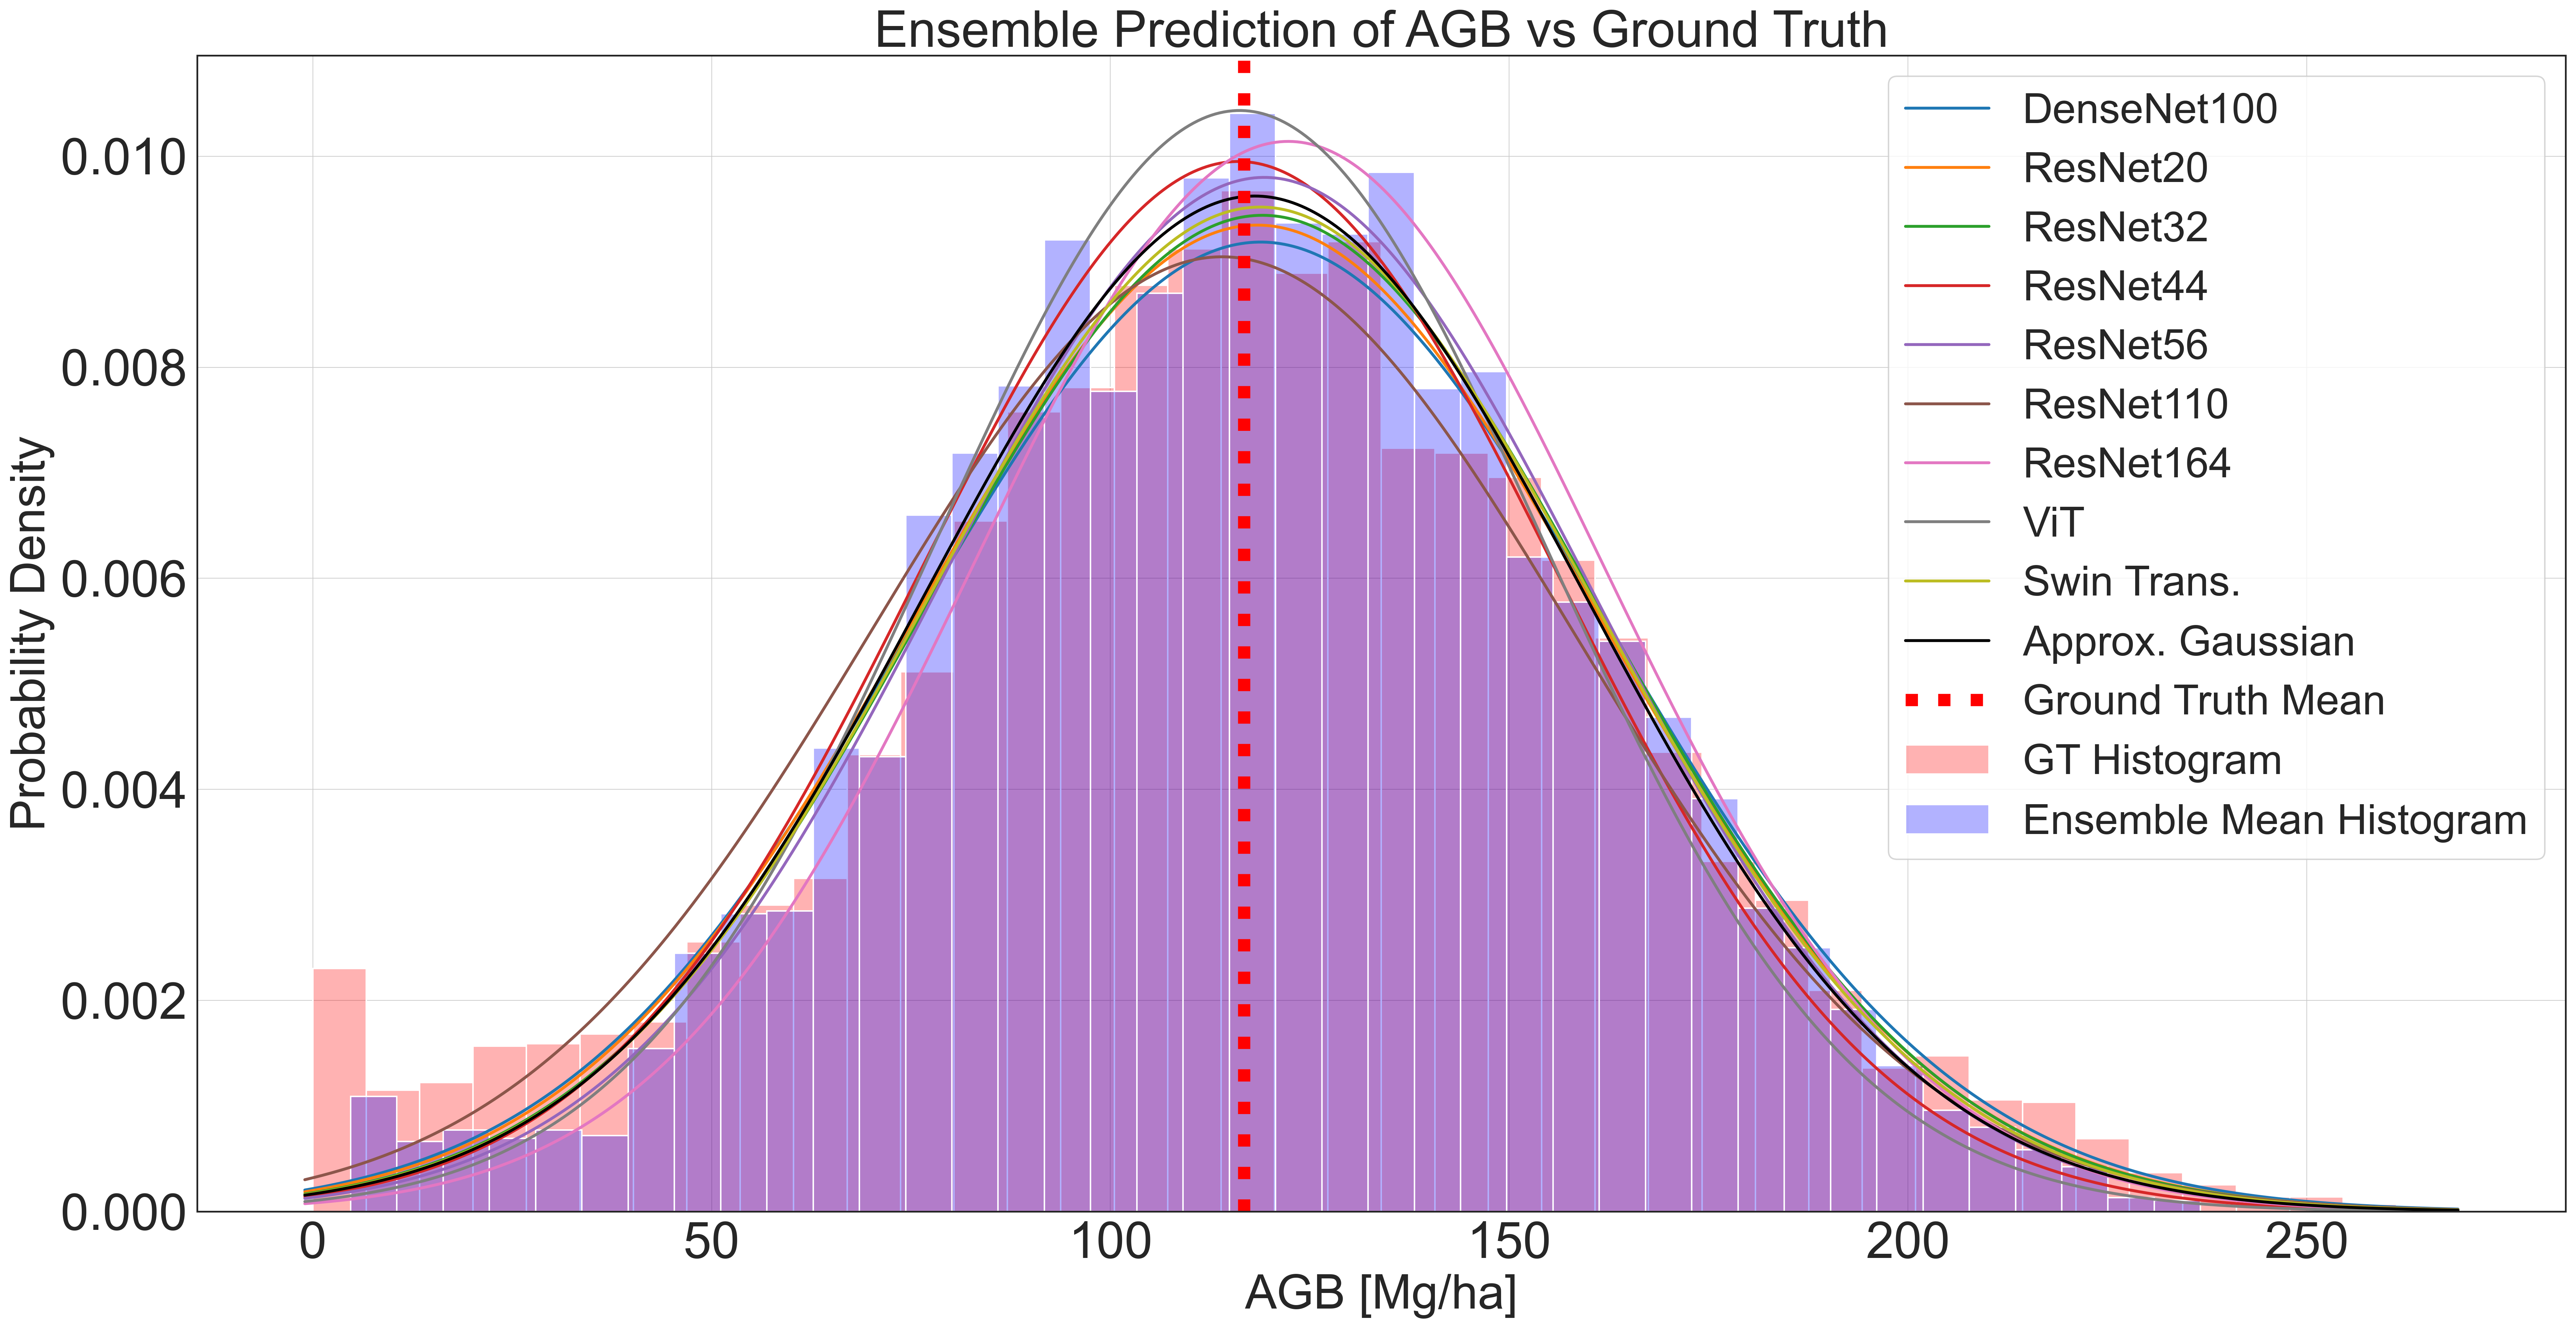

In [ ]:
mpl.rcParams['legend.fontsize'] = 29
plt.figure(figsize=(25, 13))
colors = plt.cm.tab10.colors
ensemble_values = []

for i, (mu, std) in enumerate(zip(scaled_mu_values, scaled_std_list)):
    pdf = norm.pdf(x, mu, std)
    ensemble_values.append(pdf)
    plt.plot(x, pdf, color=colors[i % 10], label=model_names[i], lw=2)

# Mixture PDF
ensemble_mixture = np.mean(ensemble_values, axis=0)
# plt.plot(x, ensemble_mixture, 'k--', label='Mixture (mean of PDFs)', linewidth=2)

# Gaussian Approximation
mu_ens = np.mean(scaled_mu_values)
std_ens = np.sqrt(np.mean([s**2 for s in scaled_std_list]))
gauss_approx = norm.pdf(x, mu_ens, std_ens)
plt.plot(x, gauss_approx, 'k-', label='Approx. Gaussian', linewidth=2)

# Ground Truth
plt.axvline(scaled_gt_value, color='red', linestyle=':', linewidth=8.5, label='Ground Truth Mean')


sns.histplot(scaled_gt_flat, bins=40, color='red', label='GT Histogram', stat='density', kde=False, alpha=0.3)
sns.histplot(scaled_ensemble_mean_flat, bins=40, color='blue', label='Ensemble Mean Histogram', stat='density', kde=False, alpha=0.3)

plt.title("Ensemble Prediction of AGB vs Ground Truth", fontsize=35)
plt.xlabel("AGB [Mg/ha]", fontsize=33)
plt.ylabel("Probability Density", fontsize=33)
plt.tick_params(axis='both', which='major', labelsize=35) 
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("AGB_Ensemble_Histogram_Scaled.png", dpi=300)
plt.show()

In [40]:
%reset -f

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Full paths to all raster prediction maps
raster_paths = [
    r"F:\DensNet100.tif",
    r"F:\ResNet20.tif",
    r"F:\ResNet32.tif",
    r"F:\ResNet44.tif",
    r"F:\Transfer_ResNet56_7947.tif",
    r"F:\ResNet110.tif",
    r"F:\ResNet164.tif",
    r"F:\Abs_ViT.tif",
    r"F:\Transfer_SWIN_7971.tif"
]

ground_truth_path = r"F:\Aggregate_AGB_zero.tif"
# Model names
model_names = [
    "DenseNet100", "ResNet20", "ResNet32", "ResNet44",
    "ResNet56", "ResNet110", "ResNet164", "ViT", "Swin"
]

def read_tif(path):
    with rasterio.open(path) as src:
        return src.read(1).astype(np.float32)

# Read the ground truth AGB map
gt_map = read_tif(ground_truth_path)

# Valid pixels mask (finite values and positive AGB)
valid_mask = np.isfinite(gt_map) & (gt_map > 0)

# Lists to store results
predictions = []
biases = []
variances = []

# Scaling factor (consistent with the main processing pipeline)
scale_factor = 0.09 / 81

# Compute bias and variance for each model
for path in raster_paths:
    pred_map = read_tif(path)

    # Apply scaling
    pred_vals = pred_map[valid_mask] * scale_factor
    gt_vals = gt_map[valid_mask] * scale_factor

    predictions.append(pred_vals)

    error = pred_vals - gt_vals
    bias = np.mean(error)
    variance = np.var(error)

    biases.append(abs(bias))
    variances.append(variance)

# Ensemble prediction (mean of all model predictions)
ensemble_pred = np.mean(predictions, axis=0)
ensemble_error = ensemble_pred - gt_map[valid_mask] * scale_factor
ensemble_bias = np.mean(ensemble_error)
ensemble_variance = np.var(ensemble_error)

# Append ensemble results
biases.append(abs(ensemble_bias))
variances.append(ensemble_variance)
model_names.append("Ensemble")
predictions.append(ensemble_pred)

# --- Sort models by bias in descending order (highest to lowest) ---
# Create tuples of (bias, variance, model_name, predictions) and sort by bias
sorted_data = sorted(
    zip(biases, variances, model_names, predictions),
    key=lambda x: x[0],  # sort by bias
    reverse=True        # descending order
)

# Unpack sorted lists
biases_sorted, variances_sorted, model_names_sorted, predictions_sorted = zip(*sorted_data)

# Convert to lists for further modification if needed
biases_sorted = list(biases_sorted)
variances_sorted = list(variances_sorted)
model_names_sorted = list(model_names_sorted)
predictions_sorted = list(predictions_sorted)

# --- Identify the best model (minimum total error) in the original order ---
total_error_original = np.array(biases) + np.array(variances)
best_index_original = np.argmin(total_error_original)
best_model_name = model_names[best_index_original]

# Find the position of the best model in the sorted list
try:
    best_index_in_sorted = model_names_sorted.index(best_model_name)
except ValueError:
    best_index_in_sorted = -1  # Not found

# --- Plot bias and variance using sorted data ---
fig, ax1 = plt.subplots(figsize=(14, 7))
ax2 = ax1.twinx()

x = np.arange(len(model_names_sorted))

# Bias curve (sorted from left to right)
l1 = ax1.plot(x, biases_sorted, 'r-', linewidth=2, label='Bias')
ax1.scatter(x, biases_sorted, color='black', s=70)
ax1.set_ylabel('Bias (Mg ha⁻¹)', color='red', fontsize=17)
ax1.tick_params(axis='y', labelcolor='red', labelsize=16)

# Variance curve (following the same bias-based order)
l2 = ax2.plot(x, variances_sorted, 'deepskyblue', linewidth=2, label='Variance')
ax2.scatter(x, variances_sorted, color='black', s=70)
ax2.set_ylabel('Variance (Mg² ha⁻²)', color='deepskyblue', fontsize=17)
ax2.tick_params(axis='y', labelcolor='deepskyblue', labelsize=16)

# X-axis settings
ax1.set_xticks(x)
ax1.set_xticklabels(model_names_sorted, rotation=45, ha='right', fontsize=15)

# Vertical line highlighting the best model
if best_index_in_sorted >= 0:
    ax1.axvline(best_index_in_sorted, color='black', linestyle='--', linewidth=3)

# Combine legends
lines = l1 + l2
if best_index_in_sorted >= 0:
    from matplotlib.lines import Line2D
    best_line = Line2D(
        [0], [0],
        color='black',
        linestyle='--',
        label=f'Best model: {best_model_name}'
    )
    lines.append(best_line)

labels = [line.get_label() for line in lines]
fig.legend(
    lines,
    labels,
    loc='upper left',
    bbox_to_anchor=(0.15, 0.90),
    frameon=False,
    fontsize=15
)

# Plot title
plt.title("Bias and Variance per Model (AGB Estimation)", fontsize=15, pad=20)

# Grid settings
ax1.grid(True, axis='x', alpha=0.6)
ax2.grid(False)

# Save and display the figure
output_path = "bias_variance_per_model_sorted_by_bias.png"
plt.tight_layout()
plt.savefig(output_path, dpi=300)
print(f"Figure saved: {output_path}")

plt.show()


In [ ]:
import os
import numpy as np
import rasterio as rio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt

# ==========================
# Configuration
# ==========================
AGB_reference_SdtDev_path = r"C:\Standard Deviations\AGB_StdDev.tif"
# If available, provide the path to the reference AGB standard deviation map.
# No scaling will be applied to this reference map.

after_paths = {
    "DenseNet100": r"C:\AfterFineTuning_maps\DensNet100.tif",
    "ResNet20":    r"C:\AfterFineTuning_maps\ResNet20.tif",
    "ResNet32":    r"C:\AfterFineTuning_maps\ResNet32.tif",
    "ResNet44":    r"C:\AfterFineTuning_maps\ResNet44.tif",
    "ResNet56":    r"C:\AfterFineTuning_maps\Transfer_ResNet56_7947.tif",
    "ResNet110":   r"C:\AfterFineTuning_maps\ResNet110.tif",
    "ResNet164":   r"C:\AfterFineTuning_maps\ResNet164.tif",
    "ViT":         r"C:\AfterFineTuning_maps\Abs_ViT.tif",
    "Swin":        r"C:\AfterFineTuning_maps\Transfer_SWIN_7971.tif"
}

output_dir = r"C:\Standard Deviations"
os.makedirs(output_dir, exist_ok=True)

# Scaling factor applied only to model output maps;
# set to 1.0 if scaling is not required
scale = 0.09 / 81.0

# If no reference SD map is available, provide a constant label RMSE/SD value (Mg/ha)
USE_LABEL_SD_MAP = bool(AGB_reference_SdtDev_path)
LABEL_RMSE_CONST = 0.0

# ==========================
# Functions
# ==========================
def read_resampled(path, ref_profile):
    with rio.open(path) as ds:
        if (ds.width, ds.height, ds.crs, ds.transform) != (
            ref_profile['width'],
            ref_profile['height'],
            ref_profile['crs'],
            ref_profile['transform']
        ):
            arr = ds.read(
                1,
                out_shape=(ref_profile['height'], ref_profile['width']),
                resampling=Resampling.bilinear
            )
        else:
            arr = ds.read(1)
    return arr.astype(np.float32)

def save_geotiff(path, array2d, ref_profile):
    prof = ref_profile.copy()
    prof.update(dtype=rio.float32, count=1, compress="deflate")
    # Since no NoData values are defined, do not set nodata (or leave it as None)
    prof.pop('nodata', None)
    with rio.open(path, "w", **prof) as dst:
        dst.write(array2d.astype(np.float32), 1)

# ==========================
# Stack model outputs
# ==========================
first_path = next(iter(after_paths.values()))
with rio.open(first_path) as ref:
    ref_profile = ref.profile
    H, W = ref.height, ref.width

model_names, stack = [], []
for name, path in after_paths.items():
    if not os.path.isfile(path):
        print(f"[WARNING] Not found: {path}")
        continue
    arr = read_resampled(path, ref_profile).astype(np.float32)
    arr *= scale
    model_names.append(name)
    stack.append(arr)

if len(stack) < 2:
    raise RuntimeError("At least two model maps are required to compute epistemic uncertainty.")

stack = np.stack(stack, axis=0)  # Shape: (M, H, W)

# ==========================
# Ensemble mean and epistemic uncertainty
# ==========================
ensemble_mean = np.mean(stack, axis=0)
# Since no NoData values are present, nan-aware functions are not required.
# This assumes there are no NaNs in the data.
epistemic_var = np.var(stack, axis=0, ddof=1)
epistemic_sd  = np.sqrt(np.clip(epistemic_var, 0, None))

# ==========================
# Aleatoric standard deviation (no scaling applied to reference map)
# ==========================
if USE_LABEL_SD_MAP and os.path.isfile(AGB_reference_SdtDev_path):
    label_sd = read_resampled(AGB_reference_SdtDev_path, ref_profile).astype(np.float32)
    # Important: no scaling is applied to label_sd
    aleatoric_sd = np.maximum(label_sd, 0.0)
else:
    aleatoric_sd = np.full((H, W), float(LABEL_RMSE_CONST), dtype=np.float32)

# ==========================
# Total standard deviation
# ==========================
total_sd = np.sqrt(np.clip(epistemic_var + aleatoric_sd**2, 0, None))

# ==========================
# Save outputs
# ==========================
save_geotiff(os.path.join(output_dir, "Ensemble_mean_AGB.tif"), ensemble_mean, ref_profile)
save_geotiff(os.path.join(output_dir, "Epistemic_SD.tif"),       epistemic_sd,  ref_profile)
save_geotiff(os.path.join(output_dir, "Aleatoric_SD.tif"),       aleatoric_sd,  ref_profile)
save_geotiff(os.path.join(output_dir, "Total_SD.tif"),           total_sd,      ref_profile)

print("Saved:", os.path.join(output_dir, "Ensemble_mean_AGB.tif"))
print("Saved:", os.path.join(output_dir, "Epistemic_SD.tif"))
print("Saved:", os.path.join(output_dir, "Aleatoric_SD.tif"))
print("Saved:", os.path.join(output_dir, "Total_SD.tif"))
